In [198]:
import pandas as pd
import sqlite3
from openpyxl.workbook import Workbook
wb = Workbook()
#wb.create_sheet
#wb.save(filename = 'sample_book.xlsx')
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
link = r"C:\Users\HP\Desktop\book\dataset\Banking Dataset - Marketing Targets\train.csv"
df = pd.read_csv(link)

In [200]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [201]:
print(list(df.columns))
name = list(df.columns)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


### giới thiệu về từng tính chất
1. age (numeric) 
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no") => nợ xấu
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
# other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
# Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")


In [202]:
#build theo dạng eda 
# part 1: khái quát sơ qua data, các mặt đơn giản của từng chỉ số
# tỉ lệ + phân bố + thống kê
# mô tả dữ liệu
# mô tả cái gi? 
# chia ra ntn? 
# đồ thị nào tái hiện được hình ảnh


### các biểu đồ dự kiến vẽ
1. age : biểu đồ phân bố
2. job : dạng bánh or dạng cột => tùy quá trình
3. marital : dạng bánh
4. education : dạng bánh
5. default: dạng bánh (nợ xấu)
6. balance: dạng phân bố
7. housing: dạng bánh
8. loan: dạng bánh
# related with the last contact of the current campaign:
9. contact: dạng bánh
10. day: last contact day of the month (numeric) => ko có ngày tham gia => check lại => khả năng loại ra
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec") => khả năng loại ra
12. duration: last contact duration, in seconds (numeric) => phân bố (cho 2 loại win/lose)
# other attributes:
13. campaign: number of contacts performed during this campaign and for this client (phân bố)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric) => phân biệt khách hàng mới/ cũ / bị gọi nhiều or mới
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
# Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")
=> ko đo được doanh thu. 

# các dạng biểu đồ:
1. age : biểu đồ phân bố
2. job : dạng bánh or dạng cột => tùy quá trình
3. marital : dạng bánh
4. education : dạng bánh
5. default: dạng bánh (nợ xấu)
6. balance: dạng phân bố
7. housing: dạng bánh
8. loan: dạng bánh
9. contact: dạng bánh
10. duration: last contact duration, in seconds (numeric) => phân bố (cho 2 loại win/lose)
11. campaign: number of contacts performed during this campaign and for this client (phân bố)
# 
3 loại biểu đồ chính: 
    phân bố, pie , cột (maybe)

In [203]:
df["Count"] = 1
def Success_rate_rank_count(df,a,b,c) : 
    a = df.pivot_table(index = a ,columns = b, values = c ,aggfunc = ["count"])
    a = a.fillna(0)
    a.columns= a.columns.droplevel(0)
    a["Total"] = a["yes"] + a["no"]
    a["Success rate"] = a["yes"]/a["Total"]
    a = a.sort_values("Success rate",ascending = False)
    a["Success rate"] = a["Success rate"].map('{:.2%}'.format)
    return a
def Success_rate(df,a):
    result = df[a].value_counts()["yes"]/(df[a].value_counts()["no"]+df[a].value_counts()["yes"])
    return result


In [204]:
def bar_col(df,name):
    df = df.reset_index()#drop = True
    df["Success rate"] = df["Success rate"].apply(lambda x: (float(x.strip("%"))/100))
    df = df.sort_values("Success rate",ascending = True)
    fig, ax = plt.subplots(figsize=[15, 5])
    df.plot.bar(x = name, y = "Success rate", ax = ax)
    plt.tick_params(left = False,labelleft = False,labelbottom = True, bottom = False,labelsize  = 15)
    ax.set_title(name.upper(),weight = "bold",fontsize= 20)
    plt.xticks(rotation = 0)
    y = list(df["Success rate"])
    for i in range(len(y)):
        ax.text(i,y[i]/2,('{:.2%}'.format(y[i])),ha = "center", va = "center", color = "w",size = 'x-large',weight = "bold")# weight = đậm nhạt , size = cỡ chữ.

    plt.show()    


In [205]:
df["y"].value_counts()
print('{:.3%}'.format(df[df["y"] == "yes"]["y"].count() / df["y"].count() ))

11.698%


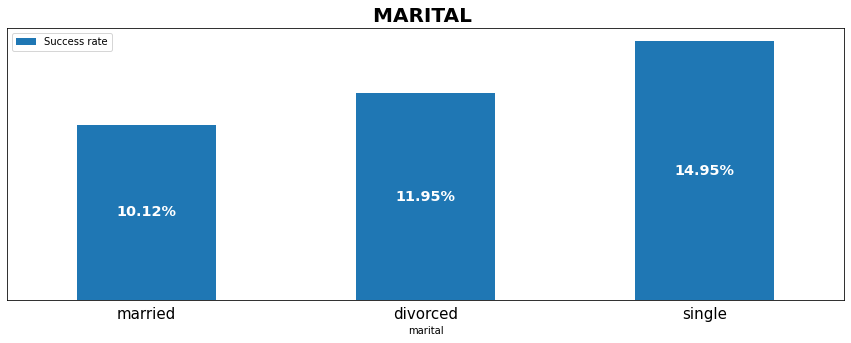

In [206]:
# marital 
marital = Success_rate_rank_count(df,"marital","y","Count")
marital

marital = marital.reset_index()#drop = True
marital["Success rate"] = marital["Success rate"].apply(lambda x: (float(x.strip("%"))/100))
marital = marital.sort_values("Success rate",ascending = True)
fig, ax = plt.subplots(figsize=[15, 5])
marital.plot.bar(x = "marital", y = "Success rate", ax = ax)
plt.tick_params(left = False,labelleft = False,labelbottom = True, bottom = False,labelsize  = 15)
ax.set_title("MARITAL ",weight = "bold",fontsize= 20)
plt.xticks(rotation = 0)
y = list(marital["Success rate"])
for i in range(len(y)):
    ax.text(i,y[i]/2,('{:.2%}'.format(y[i])),ha = "center", va = "center", color = "w",size = 'x-large',weight = "bold")# weight = đậm nhạt , size = cỡ chữ.
    
plt.show()    


In [207]:
marital

y,marital,no,yes,Total,Success rate
2,married,24459,2755,27214,0.1012
1,divorced,4585,622,5207,0.1195
0,single,10878,1912,12790,0.1495


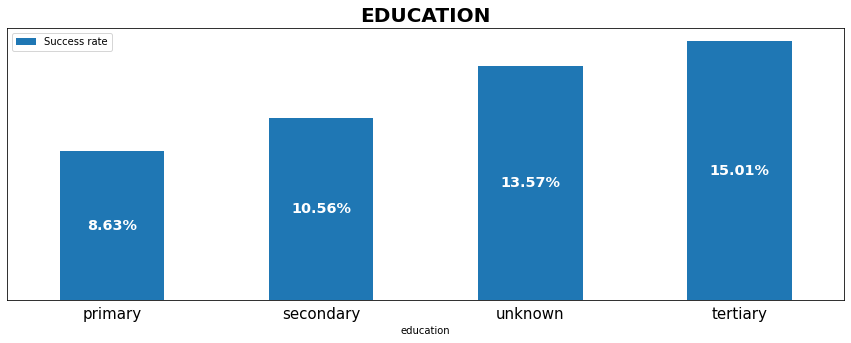

In [208]:
# education 
education = Success_rate_rank_count(df,"education","y","Count")
education
bar_col(education,"education")

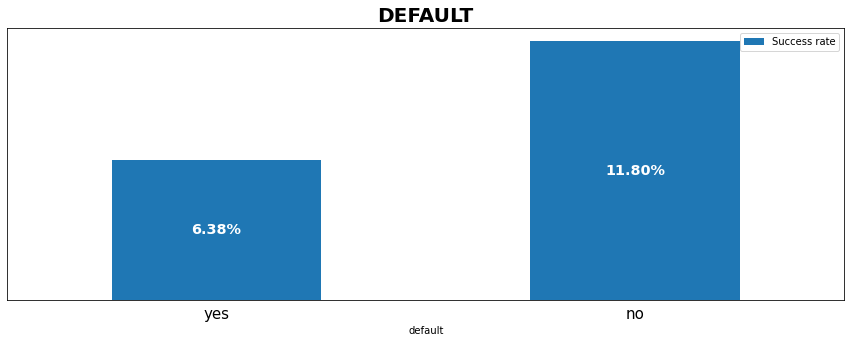

In [209]:
# default: (nợ xấu)
default = Success_rate_rank_count(df,"default","y","Count")
default
bar_col(default,"default")

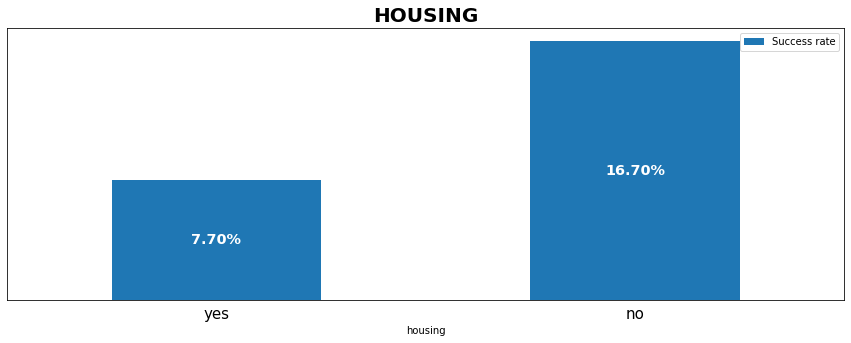

In [210]:
# housing: nợ mua nhà
    
housing = Success_rate_rank_count(df,"housing","y","Count")
housing.loc['yes','yes']/sum(housing["yes"])
housing
bar_col(housing,"housing")

In [211]:
# loan: vay nợ
loan = Success_rate_rank_count(df,"loan","y","Count")
loan.loc['yes','yes']/sum(loan["yes"])
loan

y,no,yes,Total,Success rate
loan,,,,
no,33162,4805,37967,12.66%
yes,6760,484,7244,6.68%


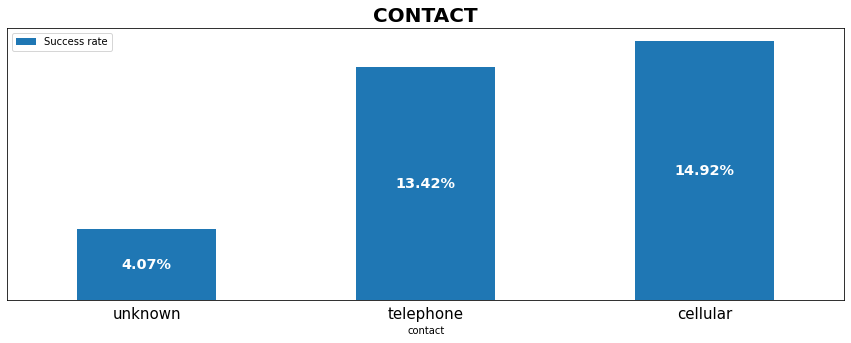

In [212]:
# contact: dạng bánh
contact = Success_rate_rank_count(df,"contact","y","Count")

contact
bar_col(contact,"contact")

In [213]:
# campaign: number of contacts performed during this campaign and for this client (phân bố)
campaign = Success_rate_rank_count(df,"campaign","y","Count")
df["campaign"].mean()
df["campaign"].median()
campaign.sort_index()
np.quantile(df["campaign"],0.75)


3.0

In [214]:
# phân tích kỹ hơn

In [215]:
#age
age = Success_rate_rank_count(df,"age","y","Count")
age.head(10)


y,no,yes,Total,Success rate
age,,,,
93,0.0,2.0,2.0,100.00%
92,0.0,2.0,2.0,100.00%
90,0.0,2.0,2.0,100.00%
85,1.0,4.0,5.0,80.00%
87,1.0,3.0,4.0,75.00%
18,5.0,7.0,12.0,58.33%
68,15.0,21.0,36.0,58.33%
84,4.0,5.0,9.0,55.56%
73,20.0,24.0,44.0,54.55%


<AxesSubplot:>

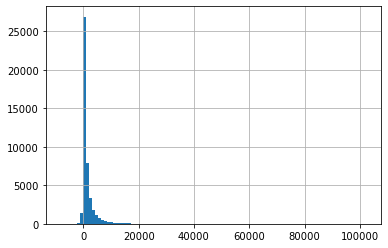

In [216]:
# balance: dạng phân bố
balance = Success_rate_rank_count(df,"balance","y","Count")
balance
df["balance"].hist(bins = 100)

In [217]:
# duration: last contact duration, in seconds (numeric) => phân bố (cho 2 loại win/lose)
duration = Success_rate_rank_count(df,"duration","y","Count")
duration

y,no,yes,Total,Success rate
duration,,,,
1973,0.0,1.0,1.0,100.00%
1129,0.0,1.0,1.0,100.00%
1158,0.0,1.0,1.0,100.00%
1154,0.0,1.0,1.0,100.00%
1153,0.0,2.0,2.0,100.00%
...,...,...,...,...
1170,1.0,0.0,1.0,0.00%
1168,1.0,0.0,1.0,0.00%
1167,2.0,0.0,2.0,0.00%


In [218]:
#job
job = Success_rate_rank_count(df,"job","y","Count")
job

y,no,yes,Total,Success rate
job,,,,
student,669,269,938,28.68%
retired,1748,516,2264,22.79%
unemployed,1101,202,1303,15.50%
management,8157,1301,9458,13.76%
admin.,4540,631,5171,12.20%
self-employed,1392,187,1579,11.84%
unknown,254,34,288,11.81%
technician,6757,840,7597,11.06%
services,3785,369,4154,8.88%


In [219]:
#Chứng minh nợ là nguyên nhân khiến khách hàng không muốn gửi tiết kiệm (xem xét balance)
loan_yes = df[df["loan"] == "yes"]
df["balance"].median()
df["balance"].mean()
loan_yes["balance"].mean()
loan_yes["balance"].median()
Success_rate_rank_count(loan_yes,"housing","y","Count")

y,no,yes,Total,Success rate
housing,,,,
no,2658,219,2877,7.61%
yes,4102,265,4367,6.07%


In [220]:
Success_rate(df,"y")

0.11698480458295547

In [221]:
df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [222]:
# biến 1 cột thành 1 bảng có các cột binary dummny: 
def dummy_table(df,col):
    a = df.copy()
    value = list(a[col].unique())
    for name in value:
        a[name] = a[col].apply(lambda x: 1 if x == name else 0)
    return a
a = dummy_table(df,"age")

In [223]:
def success_compare(df,index,columns,values):
    result = df.pivot_table(index = index, columns = columns , values = values , aggfunc = [list])
    result.columns= result.columns.droplevel(0)
    for name in list(result.columns):
        result[name] = result[name].fillna("no data")
        result[name] = result[name].apply(lambda x: None  if x == "no data" else (list(x).count("yes")/len(x)))
    return result

In [224]:
b = df[df["loan"] == "no"]
b = success_compare(b,"job","education","y")
b = b.fillna(0)

a = df[df["loan"] == "yes"]

a = success_compare(a,"job","education","y")


b-a

education,primary,secondary,tertiary,unknown
job,,,,
admin.,-0.026316,0.051078,0.035937,0.109091
blue-collar,0.013648,0.011073,0.181818,-0.057367
entrepreneur,0.051923,0.032276,0.058830,0.031694
housemaid,0.047818,0.055831,0.139241,0.093023
management,0.092437,0.023291,0.076401,0.154266
retired,0.207260,0.170542,0.150353,0.272727
self-employed,-0.078236,-0.025323,0.095916,0.131579
services,0.011704,0.039841,0.072794,0.001866
student,NaN,0.300797,0.269406,0.267081


In [225]:
b = df[df["default"] == "no"]
b = success_compare(b,"job","education","y")
b = b.fillna(0)

a = df[df["default"] == "yes"]

a = success_compare(a,"job","education","y")
a

education,primary,secondary,tertiary,unknown
job,,,,
admin.,NaN,0.029851,0.500000,0.000000
blue-collar,0.028571,0.094017,0.000000,0.181818
entrepreneur,0.000000,0.000000,0.192308,0.333333
housemaid,0.100000,0.000000,0.000000,0.000000
management,0.111111,0.034483,0.049180,0.000000
retired,0.000000,0.000000,1.000000,0.000000
self-employed,0.000000,0.105263,0.000000,NaN
services,0.000000,0.049180,0.000000,0.333333
student,0.000000,NaN,0.000000,NaN


In [226]:
b = df[df["housing"] == "no"]
b = success_compare(b,"job","education","y")
b = b.fillna(0)

a = df[df["housing"] == "yes"]

a = success_compare(a,"job","education","y")


b-a

education,primary,secondary,tertiary,unknown
job,,,,
admin.,-0.055606,0.083238,0.100098,0.082716
blue-collar,0.022514,0.049220,0.222606,0.018522
entrepreneur,-0.015091,0.085927,0.056330,-0.055673
housemaid,0.044531,0.012478,0.129772,-0.089744
management,0.049107,0.036476,0.096956,0.081196
retired,0.208344,0.148532,0.045255,0.285714
self-employed,-0.040476,0.012030,0.088873,0.100000
services,-0.062528,0.065691,0.141313,0.191071
student,0.035088,0.313274,0.268098,0.210451


<AxesSubplot:xlabel='age'>

<Figure size 432x288 with 0 Axes>

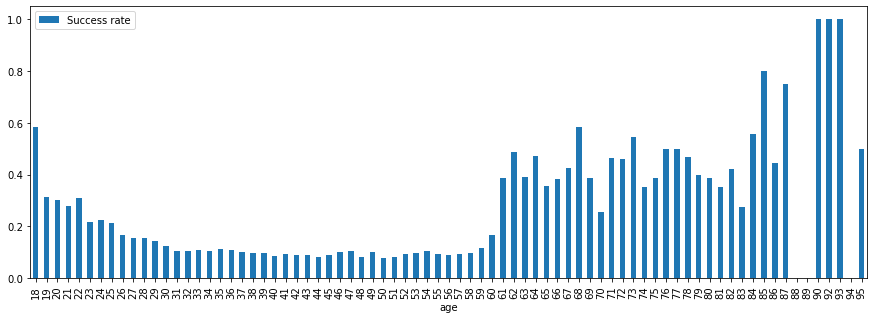

In [227]:
age = age.reset_index()#drop = True
age["Success rate"] = age["Success rate"].apply(lambda x: float((x.strip("%")))/100)
age = age.sort_values("age",ascending = True)
fig = plt.figure()
fig, ax = plt.subplots(figsize=[15, 5])
age.plot.bar(x = "age", y = "Success rate", ax = ax)

In [229]:
print(df["balance"].mean())
print(df["balance"].median())
df["balance"].quantile(0.9)
#.percentile(scores, 70, interpolation='lower'))
df["balance"].quantile(0.75)

1362.2720576850766
448.0


1428.0

In [230]:
df["balance"].quantile(0.5)

448.0

In [231]:
balance = Success_rate_rank_count(df,"balance","y","Count")
balance

y,no,yes,Total,Success rate
balance,,,,
4661,0.0,1.0,1.0,100.00%
4718,0.0,2.0,2.0,100.00%
9314,0.0,1.0,1.0,100.00%
6089,0.0,1.0,1.0,100.00%
14481,0.0,1.0,1.0,100.00%
...,...,...,...,...
2443,3.0,0.0,3.0,0.00%
2441,5.0,0.0,5.0,0.00%
2440,4.0,0.0,4.0,0.00%


In [232]:
a = (-1//100)
result = "{} _ {}".format(a*100, (a+1)*100)
result

'-100 _ 0'

In [233]:
def balance_clarify(x):
    poor_stand = 1430
    result = ""
    if x <= 0: 
        result = "Negative"
    elif x < poor_stand :
        result = "Under Basic"
    elif x < 7600:
        result = "Under Average"
    elif x <= 15400:
        result = "Average"
    else:
        result = "Above-Average"
    return result

In [234]:
df["balance_2"] = df["balance"].apply(balance_clarify)
df["balance_2"].value_counts()

Under Basic      26640
Under Average     9875
Negative          7280
Average           1083
Above-Average      333
Name: balance_2, dtype: int64

In [235]:
balance_2 = Success_rate_rank_count(df,"balance_2","y","Count")
balance_2

y,no,yes,Total,Success rate
balance_2,,,,
Average,906,177,1083,16.34%
Under Average,8272,1603,9875,16.23%
Above-Average,291,42,333,12.61%
Under Basic,23675,2965,26640,11.13%
Negative,6778,502,7280,6.90%


In [236]:
# chia mức độ thu nhập
# sơ đồ scat : balance , age
# có thể thêm : job,marital,housing
# iplot sơ đồ so sánh
'''fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')'''



"fig = ff.create_facet_grid(\n    df,\n    y='balance',\n    facet_row='marital',\n    facet_col='deposit',\n    trace_type='box',\n)\n\niplot(fig, filename='facet - box traces')"

In [237]:
# https://www.statista.com/statistics/1220367/average-net-income-per-person-spain/
#https://www.ine.es/jaxiT3/Tabla.htm?t=10942&L=1

In [238]:
# https://www.macrotrends.net/countries/ESP/spain/poverty-rate
# chuẩn nghèo của spain là 5.5$ => 3.9eur => 1450eur 1.405
# Thu nhập mỗi người
#https://www.ine.es/jaxiT3/Tabla.htm?t=10942&L=1
# ti lệ exchange : https://www.statista.com/statistics/412794/euro-to-u-s-dollar-annual-average-exchange-rate/#:~:text=In%202008%2C%20the%20euro%20to,could%20buy%201.12%20U.S.%20dollars.
# 1.47 - 1.34

<AxesSubplot:xlabel='education', ylabel='balance_2'>

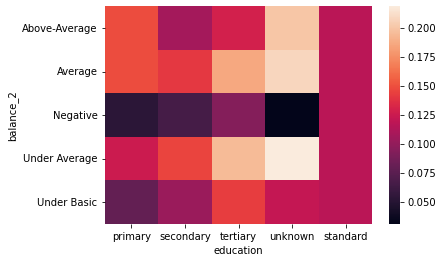

In [250]:
a = success_compare(df,"balance_2","education","y")
a["standard"] = 0.117
sns.heatmap(a)

In [258]:
a = success_compare(df,"job","balance_2","y")
a 

balance_2,Above-Average,Average,Negative,Under Average,Under Basic
job,,,,,
admin.,0.083333,0.222222,0.076834,0.163984,0.118602
blue-collar,0.031250,0.102410,0.052144,0.092778,0.071731
entrepreneur,0.086957,0.085714,0.093633,0.123746,0.064890
housemaid,0.100000,0.074074,0.052356,0.136882,0.080107
management,0.116279,0.177778,0.064769,0.185262,0.133282
retired,0.272727,0.368421,0.118467,0.305322,0.196707
self-employed,0.176471,0.114754,0.080189,0.161473,0.110043
services,0.000000,0.031746,0.070088,0.124832,0.085894
student,0.500000,0.227273,0.189655,0.314410,0.286400


In [241]:
a = success_compare(df,"balance_2","marital","y")
a

marital,divorced,married,single
balance_2,,,
Above-Average,0.151515,0.094595,0.205128
Average,0.183908,0.143662,0.206294
Negative,0.088207,0.058075,0.085227
Under Average,0.174213,0.149008,0.188864
Under Basic,0.109643,0.092797,0.147977


In [251]:
a = success_compare(df,"balance_2","housing","y")
a

housing,no,yes
balance_2,,
Above-Average,0.159204,0.075758
Average,0.226576,0.088710
Negative,0.080097,0.061647
Under Average,0.225106,0.099717
Under Basic,0.161004,0.073671


In [243]:
total_df = df[df["marital"] == "married"]
Total = total_df["housing"].count()
Yes = total_df[total_df["housing"] == "yes"]["housing"].count()
rate = Yes/Total
rate

0.5629822885279635

In [244]:
total_df = df[df["marital"] == "married"]
Total = total_df["housing"].count()
Yes = total_df[total_df["housing"] == "no"]["housing"].count()
rate = Yes/Total
rate

0.43701771147203644

In [245]:
# education
#default
# housing
# loan
# job
#marital
